# Circuit Basics 

Here, we provide an overview of working with Qiskit.  Qiskit provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Run**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Run** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In [1]:
import numpy as np
from qiskit import QuantumCircuit



## Building the circuit <a name='basics'></a>

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of three qubits.

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
# Tạo một mạch lượng tử hoạt động trên một thanh ghi lượng tử gồm ba qubit
circ = QuantumCircuit(3)

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A Controlled-NOT operation ($C_{X}$) between qubit 0 and qubit 1.
- A Controlled-NOT operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
# Thêm một cổng H trên qubit 0, đưa qubit này vào trạng thái chồng chất.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
# Thêm một cổng CX (CNOT) trên qubit điều khiển 0 và qubit mục tiêu 1,
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
# Thêm một cổng CX (CNOT) trên qubit điều khiển 0 và qubit mục tiêu 2,
circ.cx(0, 2)

## Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

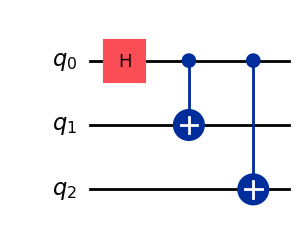

In [4]:
# Vẽ sơ đồ mạch lượng tử
circ.draw('mpl')

In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

<div class="alert alert-block alert-info">


When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. Qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the <em><strong>left</strong></em> side of the tensor product, so that the basis vectors are labeled as  $Q_{n-1}\otimes \cdots  \otimes  Q_1\otimes Q_0$.

For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as $|100\rangle$, whereas many physics textbooks would represent it as $|001\rangle$.

This difference in labeling affects the way multi-qubit operations are represented as matrices. For example, Qiskit represents a controlled-X ($C_{X}$) operation with qubit 0 being the control and qubit 1 being the target as

$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}.$$

</div>

## Simulating circuits <a name='simulation'></a>

To simulate a circuit we use the quant_info module in Qiskit. This simulator returns the quantum state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits 
(so be careful using this as it will quickly get too large to run on your machine).

There are two stages to the simulator. The first is to set the input state and the second to evolve the state by the quantum circuit.

In [5]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
# Đặt trạng thái ban đầu của bộ mô phỏng về trạng thái cơ bản bằng cách sử dụng from_int, 3 Qbit thì có 2^3 = 8 trạng thái
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
# Cách thay thế để biểu diễn trong latex
array_to_latex(state)

<IPython.core.display.Latex object>

Qiskit also provides a visualization toolbox to allow you to view the state.

Below, we use the visualization function to plot the qsphere  and a hinton representing the real and imaginary components of the state density matrix $\rho$.

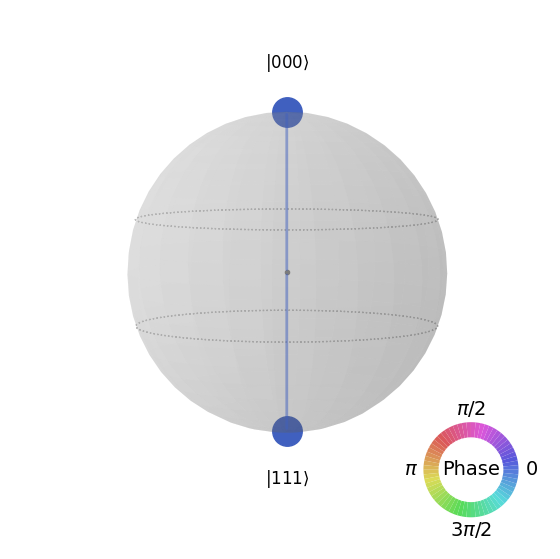

In [7]:
state.draw('qsphere')

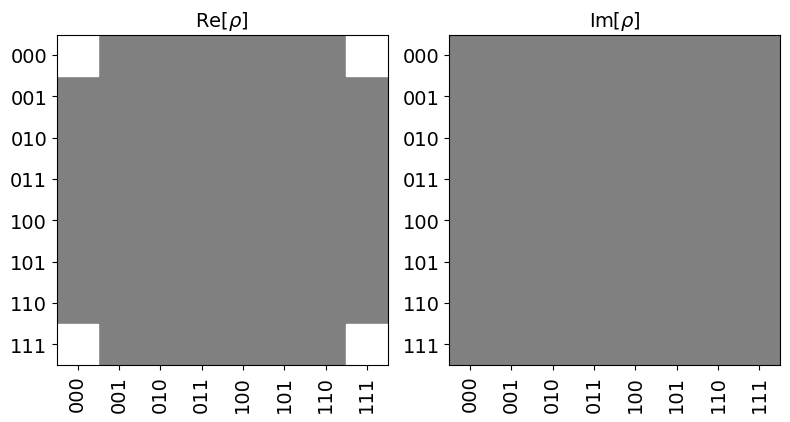

In [8]:
state.draw('hinton')

## Unitary representation of a circuit

Qiskit's quant_info module also has an operator method which can be used to make a unitary operator for the circuit. This calculates the $2^n \times 2^n$ matrix representing the quantum circuit. 

Toán tử unitary: Là biểu diễn toán học của mạch lượng tử, giữ nguyên chuẩn (norm) của vector trạng thái lượng tử khi áp dụng.

Kích thước ma trận $2^n \times 2^n$: Thể hiện tính chất mũ của không gian trạng thái lượng tử. Với mỗi qubit thêm vào, kích thước ma trận tăng gấp đôi theo cả hàng và cột.

Công dụng: Ma trận này cho phép:

Phân tích toán học của mạch

Mô phỏng kết quả của mạch mà không cần chạy trên máy tính lượng tử thật

Kiểm tra tính đúng đắn của thuật toán lượng tử

Hiểu rõ cách biến đổi trạng thái lượng tử qua mạch

Ma trận này đại diện cho hành động toán học tổng thể của toàn bộ mạch lượng tử, như một phép biến đổi trên không gian Hilbert.

In [9]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

## OpenQASM backend

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by _measuring_ each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits. 

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state

$$|\psi\rangle = (|000\rangle +|111\rangle)/\sqrt{2},$$

and let $xyz$ denote the bitstring that results. Recall that, under the qubit labeling used by Qiskit, $x$ would correspond to the outcome on qubit 2, $y$ to the outcome on qubit 1, and $z$ to the outcome on qubit 0. 

<div class="alert alert-block alert-info">
<b>Note:</b> This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way (qubit representing the MSB has index 0), which is why Qiskit uses a non-standard tensor product order.
</div>

Recall the probability of obtaining outcome $xyz$ is given by

$$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$$

and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.

Đoạn văn trên giải thích về việc đo lường (measurement) trong tính toán lượng tử và cách nó ảnh hưởng đến trạng thái lượng tử. Dưới đây là các ý chính:

1. Vai trò của đo lường trong tính toán lượng tử

Mô phỏng lý tưởng: Các trình mô phỏng lượng tử (simulators) có thể cung cấp thông tin về trạng thái lượng tử đầu ra và ma trận biểu diễn của mạch lượng tử. Tuy nhiên, đây chỉ là mô phỏng lý tưởng.

Thực nghiệm thực tế: Trong thực tế, để thu thập thông tin về trạng thái lượng tử, chúng ta phải thực hiện đo lường (measurement) trên các qubit.

Hiệu ứng của đo lường: Khi đo lường, hệ lượng tử "sụp đổ" (collapse) từ trạng thái lượng tử sang trạng thái cổ điển (classical bits). Điều này có nghĩa là trạng thái lượng tử ban đầu không còn tồn tại sau khi đo.

2. Ví dụ về trạng thái GHZ
Trạng thái GHZ: $$|\psi\rangle = (|000\rangle + |111\rangle)/\sqrt{2}$$ Đây là trạng thái lượng tử của 3 qubit, trong đó hệ thống có xác suất bằng nhau để ở trạng thái |000⟩ hoặc |111⟩.

Đo lường từng qubit: Khi đo lường độc lập từng qubit trong trạng thái GHZ, kết quả sẽ là một chuỗi bit cổ điển (bitstring) $xyz$, trong đó:

$x$: Kết quả đo trên qubit 2

$y$: Kết quả đo trên qubit 1

$z$: Kết quả đo trên qubit 0

3. Quy ước thứ tự bit
Bit quan trọng nhất (MSB): Trong biểu diễn bitstring, bit quan trọng nhất (MSB) nằm bên trái, và bit ít quan trọng nhất (LSB) nằm bên phải.
Quy ước của Qiskit: Qiskit sử dụng thứ tự không chuẩn trong tensor product, trong đó qubit có chỉ số thấp hơn (index 0) đại diện cho MSB.

4. Xác suất đo lường
Công thức xác suất: Xác suất thu được bitstring $xyz$ khi đo trạng thái lượng tử được tính bằng: $$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$$ Đây là bình phương của biên độ xác suất (amplitude) của trạng thái lượng tử.

Trạng thái GHZ: Với trạng thái GHZ, xác suất đo được bitstring |000⟩ hoặc |111⟩ đều bằng $1/2$, vì chỉ hai trạng thái này có biên độ khác 0.

5. Mô phỏng đo lường
Thêm đo lường vào mạch: Để mô phỏng một mạch lượng tử có đo lường, cần thêm các phép đo vào mạch lượng tử.
Aer backend: Khi mô phỏng mạch có đo lường, cần sử dụng một backend khác trong Qiskit, chẳng hạn như Aer, để xử lý việc đo lường và thu thập kết quả cổ điển.

Tóm lại
Đo lường là bước quan trọng trong tính toán lượng tử để chuyển trạng thái lượng tử thành thông tin cổ điển. Trạng thái GHZ là một ví dụ điển hình, trong đó việc đo lường sẽ dẫn đến kết quả bitstring |000⟩ hoặc |111⟩ với xác suất bằng nhau. Trong Qiskit, việc mô phỏng đo lường yêu cầu thêm phép đo vào mạch và sử dụng backend Aer để xử lý.

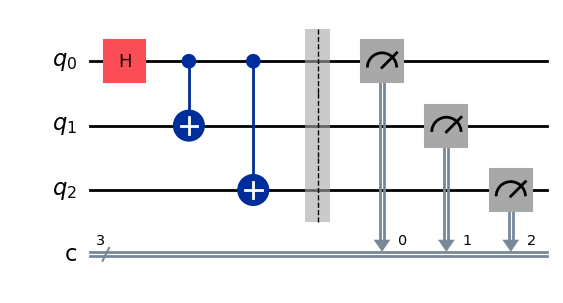

In [ ]:
# Create a Quantum Circuit
#  Tạo một mạch lượng tử
meas = QuantumCircuit(3, 3)
# QuantumCircuit(3, 3) tạo một mạch lượng tử với 3 qubit và 3 bit cổ điển.
# Các qubit sẽ được sử dụng để thực hiện các phép toán lượng tử, trong khi các bit cổ điển sẽ lưu trữ kết quả sau khi đo lường.

meas.barrier(range(3))
# Dòng lệnh meas.barrier(range(3)) trong Qiskit thêm một barrier (rào chắn) vào mạch lượng tử. 
# Đây là cách để đảm bảo rằng không có phép toán lượng tử nào được tối ưu hóa hoặc thay đổi thứ tự trước khi thực hiện các thao tác tiếp theo.
# Ý nghĩa cụ thể:
# range(3): Tạo một danh sách các qubit từ 0 đến 2 (tương ứng với 3 qubit trong mạch).
# barrier: Thêm một rào chắn vào các qubit được chỉ định (ở đây là tất cả 3 qubit).
# Công dụng của barrier:
# Ngăn tối ưu hóa mạch: Trong quá trình biên dịch mạch lượng tử, các phép toán có thể được tối ưu hóa hoặc sắp xếp lại. Barrier đảm bảo rằng các phép toán trước và sau rào chắn không bị thay đổi thứ tự.
# Tăng tính trực quan: Barrier giúp phân tách các phần khác nhau của mạch, làm cho mạch dễ đọc và dễ hiểu hơn.
# Kiểm soát thứ tự thao tác: Đảm bảo rằng các thao tác trên qubit diễn ra theo đúng thứ tự mong muốn.
# Ví dụ:
# Nếu bạn thêm barrier trước khi đo lường, nó đảm bảo rằng tất cả các phép toán lượng tử đã hoàn thành trước khi thực hiện phép đo.

# map the quantum measurement to the classical bits
# ánh xạ phép đo lượng tử đến các bit cổ điển
meas.measure(range(3), range(3))
# Dòng lệnh meas.measure(range(3), range(3)) trong Qiskit thực hiện phép đo trên tất cả các qubit trong mạch lượng tử và lưu kết 
# quả vào các bit cổ điển tương ứng.
# Giải thích chi tiết:
# range(3): Tạo một danh sách các chỉ số từ 0 đến 2, tương ứng với 3 qubit và 3 bit cổ điển trong mạch.
# measure(qubits, classical_bits): Phép đo lượng tử:
# Đo trạng thái của các qubit được chỉ định.
# Lưu kết quả đo vào các bit cổ điển tương ứng.
# Kết quả:
# Sau khi thực hiện phép đo, trạng thái lượng tử của các qubit sẽ "sụp đổ" (collapse) thành trạng thái cổ điển.
# Các bit cổ điển sẽ chứa kết quả đo, ví dụ: nếu trạng thái lượng tử là |000⟩, thì các bit cổ điển sẽ lưu giá trị [0, 0, 0].

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)
# Dòng lệnh qc = meas.compose(circ, range(3), front=True) trong Qiskit kết hợp hai mạch lượng tử (meas và circ) lại với nhau. Cụ thể:
# Giải thích chi tiết:
# meas: Đây là mạch lượng tử chứa các phép đo (đã được định nghĩa trước đó).
# circ: Đây là mạch lượng tử khác, có thể chứa các phép toán lượng tử (đã được định nghĩa trước đó).
# compose: Phương thức này kết hợp hai mạch lượng tử lại với nhau. Nó ghép các thao tác của mạch circ vào mạch meas.
# range(3): Xác định rằng mạch circ sẽ được áp dụng lên 3 qubit đầu tiên của mạch meas.
# front=True: Xác định rằng mạch circ sẽ được ghép vào phía trước mạch meas. Điều này có nghĩa là các thao tác trong circ sẽ được thực hiện trước, 
# sau đó mới đến các thao tác trong meas.
# Kết quả:
# Mạch lượng tử mới qc sẽ bao gồm:
# Các thao tác trong mạch circ được thực hiện trước.
# Các thao tác trong mạch meas (bao gồm đo lường) được thực hiện sau.

#drawing the circuit
qc.draw('mpl')

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits. 

To simulate this circuit, we use the ``qasm_simulator`` in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the ``execute`` function, via the ``shots`` keyword.

Đoạn văn trên giải thích cách thêm phép đo vào mạch lượng tử và cách mô phỏng mạch này để thu thập kết quả đo lường. Dưới đây là các ý chính:

1. Thêm thanh ghi cổ điển và phép đo

Thanh ghi cổ điển: Mạch lượng tử được thêm một thanh ghi cổ điển (classical register) để lưu trữ kết quả đo lường từ các qubit.
Phép đo: Mỗi qubit được đo và kết quả của phép đo được ánh xạ (map) vào các bit cổ điển tương ứng. Điều này cho phép chuyển trạng thái lượng tử thành dữ liệu cổ điển.

2. Mô phỏng mạch với Qiskit Aer

Qasm Simulator: Đây là một backend trong Qiskit Aer, được sử dụng để mô phỏng mạch lượng tử có phép đo. Nó mô phỏng quá trình đo lường và trả về kết quả dưới dạng các bitstring cổ điển.
Kết quả đo lường: Với trạng thái GHZ: $$|\psi\rangle = (|000\rangle + |111\rangle)/\sqrt{2},$$ Kết quả đo lường sẽ chỉ là một trong hai bitstring:
000 với xác suất 50%.
111 với xác suất 50%.

3. Thu thập thống kê

Lặp lại mạch nhiều lần: Để ước tính xác suất của các bitstring (ví dụ: $\mathrm{Pr}(000)$), cần chạy mạch nhiều lần. Mỗi lần chạy mạch sẽ trả về một bitstring.
Số lần chạy (shots): Số lần chạy mạch được chỉ định thông qua tham số shots trong hàm execute. Ví dụ:
Nếu shots=1000, mạch sẽ được chạy 1000 lần.
Kết quả sẽ là một phân phối thống kê của các bitstring, từ đó có thể tính toán xác suất của từng bitstring.


In [18]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile 

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)
# Dòng lệnh qc_compiled = transpile(qc, backend) trong Qiskit thực hiện quá trình transpile (biên dịch) mạch lượng 
# tử qc để chuẩn bị cho việc chạy trên một backend cụ thể.
# Giải thích chi tiết:
# 1. Transpile là gì?
# Transpile là quá trình chuyển đổi mạch lượng tử từ dạng logic ban đầu sang dạng tối ưu hóa hoặc tương thích với một backend cụ thể.
# Backend có thể là:
# Mô phỏng (ví dụ: qasm_simulator).
# Máy tính lượng tử thực tế (ví dụ: IBM Quantum hardware).
# 2. Các bước transpile:
# Tối ưu hóa mạch: Giảm số lượng cổng lượng tử hoặc thao tác để mạch chạy hiệu quả hơn.
# Chuyển đổi cổng lượng tử: Đảm bảo rằng các cổng lượng tử trong mạch tương thích với các cổng hỗ trợ bởi backend. Ví dụ:
# Một số backend chỉ hỗ trợ cổng CX và U3, nên các cổng khác sẽ được chuyển đổi sang dạng tương thích.
# Ánh xạ qubit: Nếu backend là phần cứng lượng tử, quá trình transpile sẽ ánh xạ các qubit logic trong mạch sang các qubit vật lý trên thiết bị.
# 3. Tham số trong lệnh:
# qc: Mạch lượng tử cần được biên dịch.
# backend: Backend mà mạch sẽ được biên dịch để chạy. Backend này có thể là:
# Một trình mô phỏng (ví dụ: qasm_simulator).
# Một máy tính lượng tử thực tế (ví dụ: ibmq_manila).
# 4. Kết quả:
# qc_compiled: Mạch lượng tử đã được biên dịch, tối ưu hóa và chuyển đổi để tương thích với backend. Mạch này có thể được chạy trực tiếp trên backend.

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [19]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 508, '111': 516}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

Kết quả của đoạn mã trên cho thấy phân phối thống kê của các bitstring thu được sau khi chạy mạch lượng tử đã biên dịch (qc_compiled) trên trình mô phỏng (result_sim). Dưới đây là giải thích chi tiết:

1. Ý nghĩa của get_counts
result_sim.get_counts(qc_compiled): Phương thức này lấy kết quả đo lường từ mạch lượng tử đã chạy và trả về số lần xuất hiện của mỗi bitstring.
Kết quả là một từ điển (dictionary), trong đó:
Key: Các bitstring đo được (ví dụ: '000', '111').
Value: Số lần bitstring đó xuất hiện trong các lần chạy mạch (shots).
2. Kết quả đo lường
Kết quả trả về:

Bitstring '000': Xuất hiện 508 lần.

Bitstring '111': Xuất hiện 516 lần.

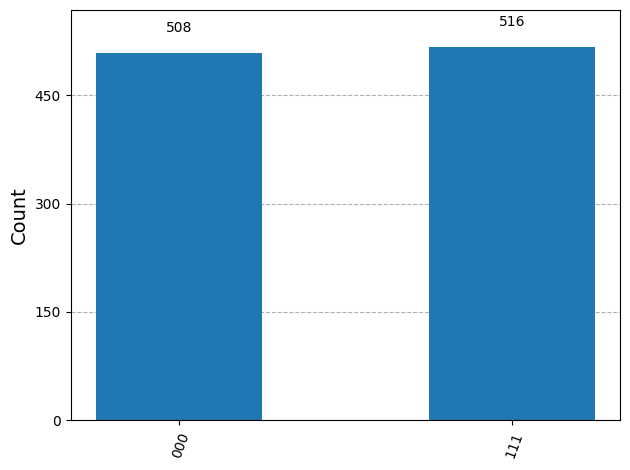

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``execute`` function and see how the estimated probabilities change.

In [ ]:
import qiskit


print("Qiskit version:", qiskit.__version__)



Qiskit version: 2.0.2
